# Métricas de desempeño



## Clasificación

### Matriz de confusión

Una matriz de confusión mide la cantidad de clasificaciones correctas e incorrectas en un modelo. Estas predicciones aparecen en forma de matriz, tal que

In [1]:
import numpy as np

from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
actual = np.random.binomial(1, 0.9, size = 10000)
predicted = np.random.binomial(1, 0.9, size = 10000)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Falso', 'Verdadero'])

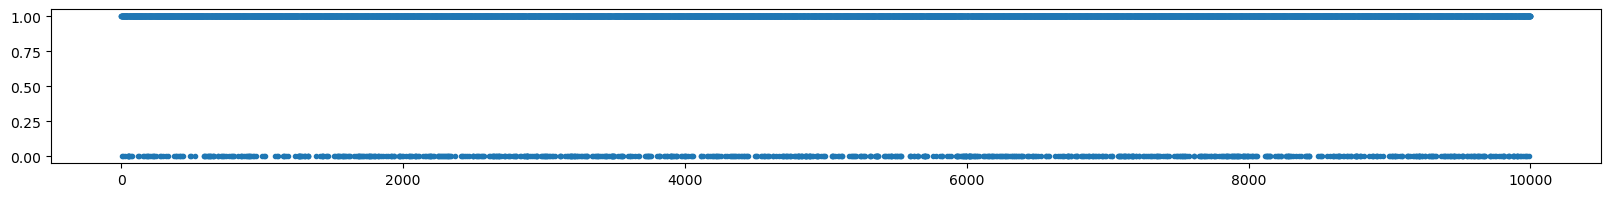

In [3]:
plt.figure(figsize=(20, 2))
plt.plot(actual, '.')

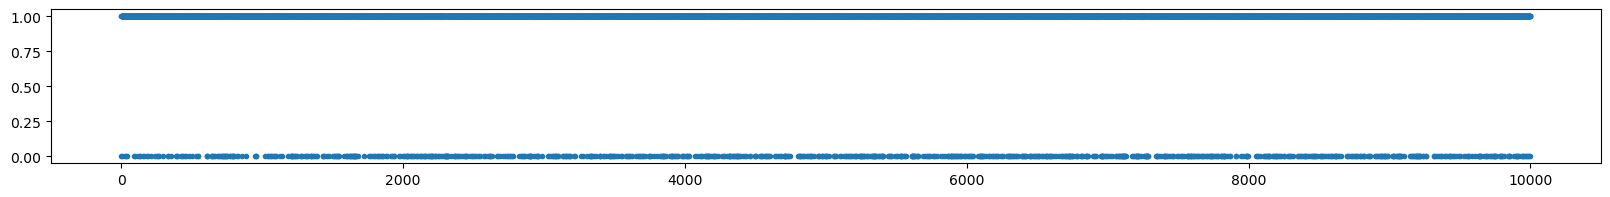

In [4]:
plt.figure(figsize=(20, 2))
plt.plot(predicted, '.')

<Figure size 640x480 with 0 Axes>

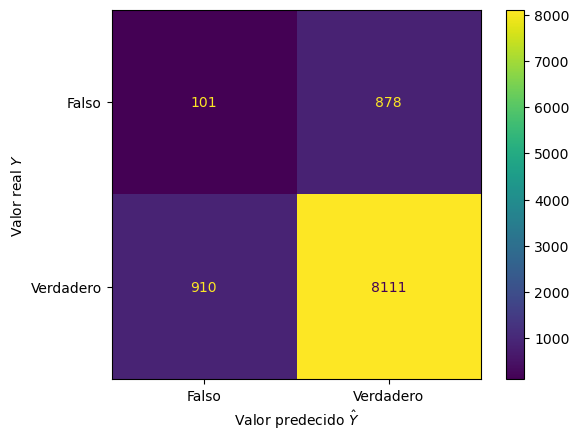

In [5]:
plt.figure()
cm_display.plot()
plt.ylabel('Valor real $Y$')
plt.xlabel('Valor predecido $\hat{Y}$')
plt.show()

En esta matriz, se tienen cuatro posibilidades
- un *verdadero positivo* (VP) son los resultados correctamente clasificado como positivo;
- un *verdadero negativo* (VN) se trata de los resultados correctamente clasificado como negativo;
- un *falso positivo* (FP) son los errores de clasificación de resultado positivo, conocido como Error tipo I; y
- un *falso negativo* (FN) representa los errores de clasificación de resultado negativo, o Error tipo II.

A partir de estos valores, se pueden calcular
- la **exactitud** (_accuracy_) como la proporción de clasificaciones positivas que fueron correctas, es decir $(VP + VN) / (VP + VN + FP + FN)$;
- la **precisión** o **valor predictivo positivo** (_precision_ o _positive predictive value_) en tanto la proporción de clasificaciones verdaderas positivas entre las clasificaciones verdaderas, o sea $VP / (VP + FP)$;
- la **sensibilidad** (_recall_ o _sensitivity_) corresponde a la proporción de verdaderos positivos dados todos los positivos, a saber $VP / (VP + FN)$; y
- la **especificidad** (_specificity_) es la proporción de verdaderos negativos, tal que $VN / (VN + FP)$.

También es posible calcular la **tasa de falsos negativos** (o tasa de error) como $FN / (FN + VP)$.

### Valor-$F$

Se trata de obtener la mejor precisión y sensibilidad, mediante la fórmula

$$
F_1 = 2 \cdot \frac{\text{sensibilidad} \cdot \text{precisión}}{\text{sensibilidad} + \text{precisión}}.
$$

El valor-$F$ pertenece al intervalo de solución $[0, 1]$. Cuando el valor-$F= 1$, se tiene la mejor sensibilidad y precisión, lo que quiere decir que no se equivoca en clasificar positivos, prácticamente, o también se puede interpretar como que un modelo clasifica un valor-$F$ de las veces los valores positivos.

### $F_{\beta}$

Para dar una proporción distinta entre los valores de sensibilidad y precisión en $F_1$, se puede asignar un coeficiente $\beta$ a la precisión, de modo que 

$$
F_\beta = (1 + \beta) \cdot \frac{\text{sensibilidad} \cdot \text{precisión}}{\text{sensibilidad} + (\beta^2 \cdot \text{precisión})}.
$$

### Media-$G$

Se llama $G$-mean en inglés y se usa cuando hay una gran desproporción entre los elementos clasificados positiva y negativamente ($80\%/20\%$, por ejemplo). Se calcula mediante $\sqrt{\text{sensibilidad} \cdot \text{precisión}}$.

### AUC y ROC

El área bajo la curva (_Area Under the Curve_) y la característica operativa del receptor 😕 (_Receiver Operating Characteristic_) representan gráficamente la capacidad de un modelo de clasificar los verdaderos positivos, dada la gráfica

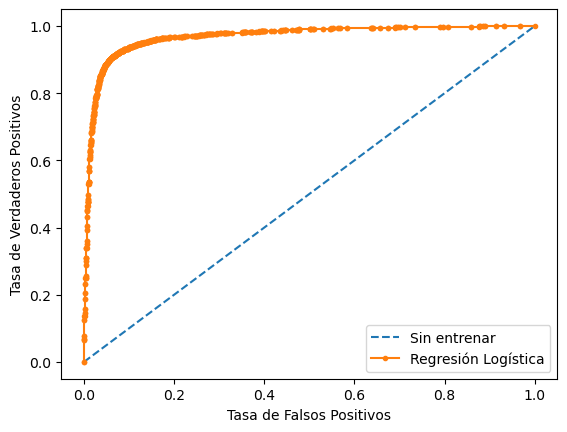

In [6]:
# https://www.themachinelearners.com/curva-roc-vs-prec-recall/
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_classes=2)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.7)

model = LogisticRegression()
model.fit(trainX, trainy)

# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

ns_probs = [0 for _ in range(len(testy))]

ns_fpr, ns_tpr, _ = metrics.roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(testy, lr_probs)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.show()

Los valores arriba y a la izquierda de la línea punteada son los valores con mejor sensibilidad (tasa de verdaderos positivos) y menor tasa de falsos positivos. Los valores sobre la línea punteada representan la misma cantidad de verdaderos positivos frente a falsos positivos. Si hubiera valores por debajo de esa línea, serían predicciones peores que el azar.

## Regresión

### MSE

Error cuadrático medio (_Mean Squared Error_) se calcula como

$$
\text{MSE} = \frac{\sum_i (Y - \hat{Y})^2}{N}.
$$

Se relaciona con la varianza. Valores menores son mejores.

### RMSE

Error de raíz cuadrada media (_Root Mean Squared Error_), dado por

$$
\text{RMSE} = \sqrt{\frac{\sum_{i} (Y - \hat{Y})^2}{N}}.
$$

Se relaciona con la desviación estándar. Valores menores son mejores.

### $R^2$

Mide qué tan bueno es un modelo con base en la predicción a partir de la media. En otras palabras, mide la cantidad de varianza que explica un modelo con respecto a la varianza total del problema. Sus valores van entre $0$ y $1$. Un modelo con $R^2 = 1$ quiere decir que explica por completo las variaciones respecto a la media, o sea que está ajustado.

$$
R^2 = 1 - \frac{\text{MSE}}{\sum_i (\bar{Y} - \hat{Y})^2}.
$$

### MAE

Error absoluto medio (_Mean Absolute Error_) se calcula como

$$
\text{MAE} = \frac{\sum_i |Y - \hat{Y}|}{N}.
$$

Se expresa en las unidades de medida. Valores menores son mejores.

### MAPE

Error absoluto medio (_Mean Absolute Error_) se calcula como

$$
\text{MAPE} = \frac{100}{N} \cdot\frac{\sum_i |Y - \hat{Y}|}{Y}.
$$

Se expresa normalizado entre $0$ y $1$. Valores menores son mejores.

## Tarea (10 puntos)

- Revisa en la literatura las métricas de desempeño que se utilizan en tu problema.
- Elige al menos una métrica para aplicar a tus modelos.
- Reporta estos hallazgos en el marco teórico de tu artículo.